#1.Load Dataset

**The data set includes information about:**
*   Customers who left within the last month – the column is called "Churn"
*   Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
*   Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
*   Demographic info about customers – gender, age range, and if they have partners and dependents

In [1]:
# https://www.kaggle.com/datasets/blastchar/telco-customer-churn
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1S-zn5NqoZ0bx2X2pEkyLXEiG-FvH3KBt' -O Telco-Customer-Churn.csv

--2023-09-23 12:09:02--  https://docs.google.com/uc?export=download&id=1S-zn5NqoZ0bx2X2pEkyLXEiG-FvH3KBt
Resolving docs.google.com (docs.google.com)... 108.177.96.113, 108.177.96.102, 108.177.96.138, ...
Connecting to docs.google.com (docs.google.com)|108.177.96.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-28-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5149eoop0dh7gbbhn8gle62e56mmlldc/1695470925000/05830297694632628921/*/1S-zn5NqoZ0bx2X2pEkyLXEiG-FvH3KBt?e=download&uuid=c738ffdf-9d25-433e-ba8a-7b0fe2247042 [following]
--2023-09-23 12:09:03--  https://doc-00-28-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5149eoop0dh7gbbhn8gle62e56mmlldc/1695470925000/05830297694632628921/*/1S-zn5NqoZ0bx2X2pEkyLXEiG-FvH3KBt?e=download&uuid=c738ffdf-9d25-433e-ba8a-7b0fe2247042
Resolving doc-00-28-docs.googleusercontent.com (doc-00-28-docs.googleusercontent.com)... 142.251.31.132, 2a00:1450:

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("Telco-Customer-Churn.csv")

#2.Exploratory Data Analysis (EDA)

In [3]:
# print sample data 10 rows
print(df.sample(10))

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
4316  8413-YNHNV    Male              0      No         No      69   
3940  1559-DTODC    Male              0      No         No      19   
2687  5213-TWWJU    Male              0      No         No      28   
3617  3346-BRMIS  Female              1     Yes         No      18   
4800  9300-AGZNL    Male              1      No         No       1   
918   6103-BOCOU  Female              0      No         No      26   
1095  7439-DKZTW    Male              0      No         No       1   
5288  8058-INTPH  Female              0      No         No       1   
2518  0447-RXSGD    Male              0      No         No      24   
5439  5959-BELXA    Male              1      No         No      32   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
4316          Yes               Yes             DSL            Yes  ...   
3940           No  No phone service             DSL             No  ...   
2687

In [4]:
# check the number of columns  and rows
df.shape

(7043, 21)

In [5]:
# show statistics of columns that have number data type
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
# Check duplicates
df.duplicated().sum()

0

In [7]:
# Check null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
# Replaces the spaces with null values
df['TotalCharges'] = df["TotalCharges"].replace(" ",np.nan)

In [9]:
# Check null values again
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
# Drop null value
df.dropna(inplace = True)

In [11]:
# Check null values again
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
# Check Unique Value of all columns
for cols in df.columns:
  print(cols,": ", df[cols].unique())

customerID :  ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender :  ['Female' 'Male']
SeniorCitizen :  [0 1]
Partner :  ['Yes' 'No']
Dependents :  ['No' 'Yes']
tenure :  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService :  ['No' 'Yes']
MultipleLines :  ['No phone service' 'No' 'Yes']
InternetService :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity :  ['No' 'Yes' 'No internet service']
OnlineBackup :  ['Yes' 'No' 'No internet service']
DeviceProtection :  ['No' 'Yes' 'No internet service']
TechSupport :  ['No' 'Yes' 'No internet service']
StreamingTV :  ['No' 'Yes' 'No internet service']
StreamingMovies :  ['No' 'Yes' 'No internet service']
Contract :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :  ['Yes' 'No']
PaymentMethod :  ['Electronic check' 'Mailed c

In [13]:
# Replace 'No internet service' and 'No phone service' with 'No'
df.replace(['No internet service','No phone service'], 'No', inplace=True)

In [14]:
# Check Unique Value of all columns
for cols in df.columns:
  print(cols,": ", df[cols].unique())

customerID :  ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender :  ['Female' 'Male']
SeniorCitizen :  [0 1]
Partner :  ['Yes' 'No']
Dependents :  ['No' 'Yes']
tenure :  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService :  ['No' 'Yes']
MultipleLines :  ['No' 'Yes']
InternetService :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity :  ['No' 'Yes']
OnlineBackup :  ['Yes' 'No']
DeviceProtection :  ['No' 'Yes']
TechSupport :  ['No' 'Yes']
StreamingTV :  ['No' 'Yes']
StreamingMovies :  ['No' 'Yes']
Contract :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :  ['Yes' 'No']
PaymentMethod :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges :  [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges :  ['29.85' '188

In [15]:
# convert string values 'yes' and 'no' to numeric values '1' and '0' in churn column because of our ML model
df.loc[df.Churn == 'Yes','Churn'] = 1
df.loc[df.Churn == 'No','Churn'] = 0

# convert string values 'Female' and 'Male' to numeric values '1' and '0' in gender column
df.loc[df.gender == 'Female','gender'] = 1
df.loc[df.gender == 'Male','gender'] = 0

In [16]:
# change SeniorCitizen column to float data type
df['SeniorCitizen'] = df["SeniorCitizen"].astype(float)

# change TotalCharges column to float data type
df['TotalCharges'] = df["TotalCharges"].astype(float)

In [17]:
df['Churn'] = df["Churn"].astype(float)

<ipython-input-19-63fba50e2278>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


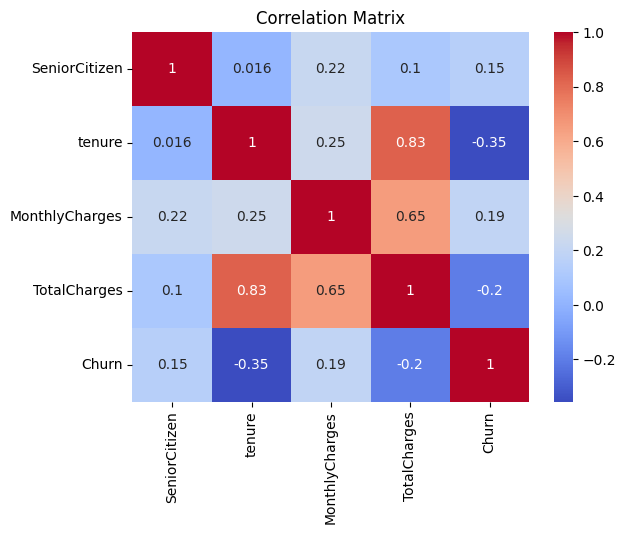

In [19]:
# Check the correlation matrix of all features

from matplotlib import pyplot as plt
import seaborn as sns

df_corr = df.corr()
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [24]:
print(df_corr)

                SeniorCitizen    tenure  MonthlyCharges  TotalCharges  \
SeniorCitizen        1.000000  0.015683        0.219874      0.102411   
tenure               0.015683  1.000000        0.246862      0.825880   
MonthlyCharges       0.219874  0.246862        1.000000      0.651065   
TotalCharges         0.102411  0.825880        0.651065      1.000000   
Churn                0.150541 -0.354049        0.192858     -0.199484   

                   Churn  
SeniorCitizen   0.150541  
tenure         -0.354049  
MonthlyCharges  0.192858  
TotalCharges   -0.199484  
Churn           1.000000  


Analysis:
1. SeniorCitizen & Churn:
Correlation: 0.150541

This shows a weak positive relationship. This implies that being a senior citizen has a slight tendency to be associated with higher churn.

2. Tenure & Churn:
Correlation: -0.354049

There is a moderate negative relationship between tenure and churn. This implies that the longer the customer has been with the company, the less likely they are to churn, which makes intuitive sense.


3. MonthlyCharges & Churn:
Correlation: 0.192858

There is a weak positive correlation between MonthlyCharges and churn, suggesting that customers with higher monthly charges are slightly more likely to churn than those with lower monthly charges.


4. TotalCharges & Churn:
Correlation: -0.199484

There is a weak negative correlation between TotalCharges and churn. This implies that customers who have paid more in total are slightly less likely to churn, potentially indicating customer satisfaction or investment in the service.


5. Tenure & TotalCharges:
Correlation: 0.825880

A strong positive correlation between tenure and TotalCharges suggests that the longer a customer stays, the more they pay in total, which is logically coherent.


6. MonthlyCharges & TotalCharges:
Correlation: 0.651065

A moderate to strong positive correlation between MonthlyCharges and TotalCharges implies that as the amount of MonthlyCharges increases, the TotalCharges also tend to increase, which is expected.


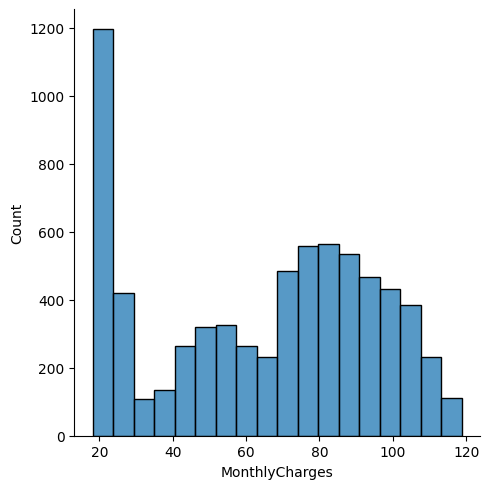

In [28]:
# visualize the distribution of 'MonthlyCharges'
sns.displot(df, x=df.MonthlyCharges)

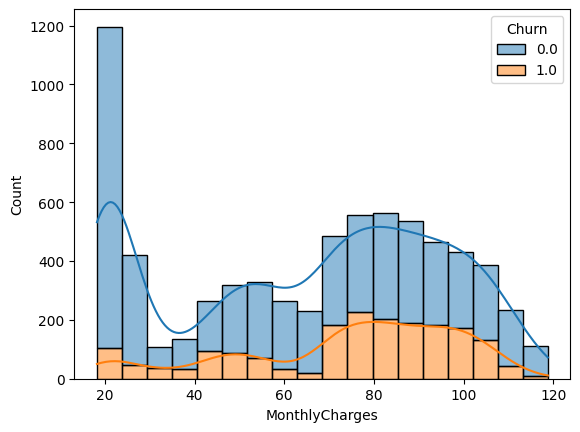

In [26]:
# Using a Histogram, visualize monthly charges and churn
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple='stack', kde=True)
plt.show()

In [29]:
# value count on 'Churn'  #Distribution of target column
df["Churn"].value_counts().values

#The data show that there’s a slight data imbalance

array([5163, 1869])

<Axes: xlabel='Churn', ylabel='count'>

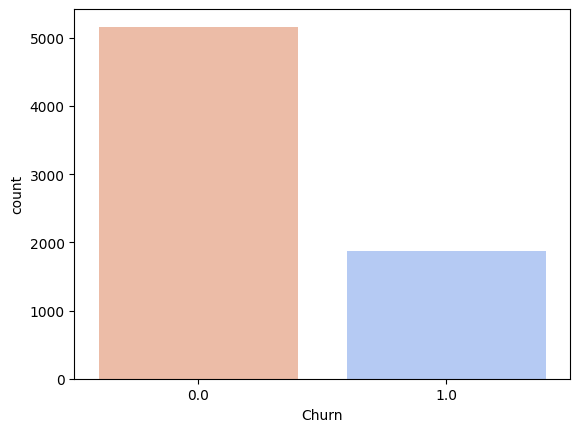

In [30]:
sns.countplot(x='Churn',data=df,palette="coolwarm_r")

<Axes: xlabel='Churn', ylabel='count'>

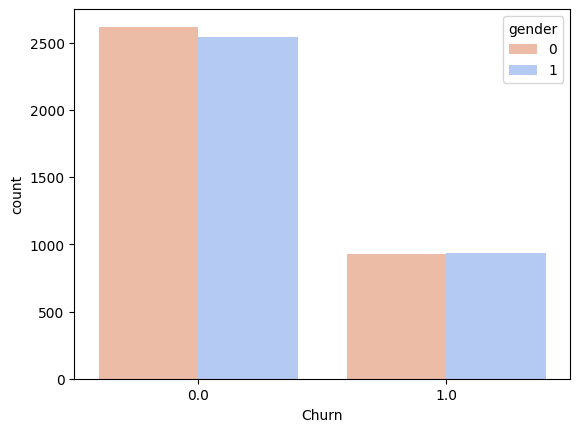

In [31]:
sns.countplot(x='Churn',data=df,hue='gender',palette="coolwarm_r")

In [32]:
columns_to_encode = ['Contract', 'gender', 'Partner',	'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'DeviceProtection', 'PaperlessBilling',
                     'OnlineBackup', 'OnlineSecurity', 'PaymentMethod', 'SeniorCitizen', 'StreamingMovies',
                     'StreamingTV', 'TechSupport']
dummies = pd.get_dummies(df[columns_to_encode])
df_onehot = pd.concat([df, dummies], axis = 1)
df_onehot

<ipython-input-32-784caecd38a3>:4: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(df[columns_to_encode])


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingMovies_No,StreamingMovies_Yes,StreamingTV_No,StreamingTV_Yes,TechSupport_No,TechSupport_Yes
0,7590-VHVEG,1,0.0,Yes,No,1,No,No,DSL,No,...,0,0,1,0,1,0,1,0,1,0
1,5575-GNVDE,0,0.0,No,No,34,Yes,No,DSL,Yes,...,0,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,0,0.0,No,No,2,Yes,No,DSL,Yes,...,0,0,0,1,1,0,1,0,1,0
3,7795-CFOCW,0,0.0,No,No,45,No,No,DSL,Yes,...,1,0,0,0,1,0,1,0,0,1
4,9237-HQITU,1,0.0,No,No,2,Yes,No,Fiber optic,No,...,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,0.0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,0,0,0,1,0,1,0,1,0,1
7039,2234-XADUH,1,0.0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,0,1,0,0,0,1,0,1,1,0
7040,4801-JZAZL,1,0.0,Yes,Yes,11,No,No,DSL,Yes,...,0,0,1,0,1,0,1,0,1,0
7041,8361-LTMKD,0,1.0,Yes,No,4,Yes,Yes,Fiber optic,No,...,0,0,0,1,1,0,1,0,1,0


In [33]:
for cols in columns_to_encode:
  df_onehot.drop([cols], axis=1, inplace = True)

In [34]:
df_onehot

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,gender_0,gender_1,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingMovies_No,StreamingMovies_Yes,StreamingTV_No,StreamingTV_Yes,TechSupport_No,TechSupport_Yes
0,7590-VHVEG,1,29.85,29.85,0.0,1,0,0,0,1,...,0,0,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,56.95,1889.50,0.0,0,1,0,1,0,...,0,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,53.85,108.15,1.0,1,0,0,1,0,...,0,0,0,1,1,0,1,0,1,0
3,7795-CFOCW,45,42.30,1840.75,0.0,0,1,0,1,0,...,1,0,0,0,1,0,1,0,0,1
4,9237-HQITU,2,70.70,151.65,1.0,1,0,0,0,1,...,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,84.80,1990.50,0.0,0,1,0,1,0,...,0,0,0,1,0,1,0,1,0,1
7039,2234-XADUH,72,103.20,7362.90,0.0,0,1,0,0,1,...,0,1,0,0,0,1,0,1,1,0
7040,4801-JZAZL,11,29.60,346.45,0.0,1,0,0,0,1,...,0,0,1,0,1,0,1,0,1,0
7041,8361-LTMKD,4,74.40,306.60,1.0,1,0,0,1,0,...,0,0,0,1,1,0,1,0,1,0


In [35]:
df_onehot.columns

Index(['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'gender_0', 'gender_1', 'Partner_No', 'Partner_Yes', 'Dependents_No',
       'Dependents_Yes', 'PhoneService_No', 'PhoneService_Yes',
       'MultipleLines_No', 'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'DeviceProtection_No', 'DeviceProtection_Yes', 'PaperlessBilling_No',
       'PaperlessBilling_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes',
       'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'StreamingMovies_No', 'StreamingMovies_Yes', 'StreamingTV_No',
       'StreamingTV_Yes', 'TechSupport_No', 'TechSupport_Yes'],
      dtype='object')

#3.Classification

##3.1Naive Bayes - Cross Validation

Using the Gaussian Naive Bayes algorithm to classify whether a customer will churn or not based on the Telco Customer Churn dataset.

In [36]:
y = df_onehot['Churn']
X = df_onehot.drop(columns=['Churn','customerID'],axis=1)

In [37]:
X.shape

(7032, 37)

In [38]:
y.shape

(7032,)

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

NB_model = GaussianNB()
cvs = cross_val_score(NB_model, X, y, cv=5)
print('cross val scores', cvs.round(3))
print('mean = ', cvs.mean().round(4) * 100)

cross val scores [0.759 0.758 0.736 0.75  0.75 ]
mean =  75.06


##3.2Naive Bayes - Train/Test split

In [40]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
NB_model = GaussianNB()
NB_model = NB_model.fit(X_train, y_train)

y_pred = NB_model.predict(X_test)
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy Score:  0.7526652452025586
              precision    recall  f1-score   support

         0.0       0.89      0.75      0.81      1009
         1.0       0.54      0.77      0.64       398

    accuracy                           0.75      1407
   macro avg       0.72      0.76      0.72      1407
weighted avg       0.79      0.75      0.76      1407

[[754 255]
 [ 93 305]]


#Exercise: Apply 3 Classification Technique to Churn Dataset

The Telco Customer Churn dataset is primarily a binary classification problem that aims to predict whether a customer will churn or not. So, the three classification techniques I chose are Logistic Regression, Decision Tree, and Random Forest.

## 1.Logistic Regression

In [45]:
# TO_DO
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Prepare the data
y = df_onehot['Churn']
X = df_onehot.drop(['Churn', 'customerID'], axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
log_reg_model = LogisticRegression(max_iter=1000)

# Fit the model
log_reg_model.fit(X_train, y_train)

# Predictions
y_pred = log_reg_model.predict(X_test)

# Confusion Matrix
cm_log_reg = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Logistic Regression:\n", cm_log_reg)

# Performance
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Confusion Matrix for Logistic Regression:
 [[912 121]
 [180 194]]
Accuracy Score:  0.7860696517412935
              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86      1033
         1.0       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



The four entries in a confusion matrix represent:
TN = 912, FP = 121
FN = 180, TP = 194

## 2.Decision Tree Classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model
dt_model.fit(X_train, y_train)

# Predictions
y_pred = dt_model.predict(X_test)

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Decision Tree Classifier:\n", cm_dt)

# Performance
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Confusion Matrix for Decision Tree Classifier:
 [[834 199]
 [180 194]]
Accuracy Score:  0.7306325515280739
              precision    recall  f1-score   support

         0.0       0.82      0.81      0.81      1033
         1.0       0.49      0.52      0.51       374

    accuracy                           0.73      1407
   macro avg       0.66      0.66      0.66      1407
weighted avg       0.74      0.73      0.73      1407



The four entries in a confusion matrix represent:
TN = 834, FP = 199
FN = 180, TP = 194


## 3.Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Random Forest Classifier:\n", cm_rf)

# Performance
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Confusion Matrix for Random Forest Classifier:
 [[926 107]
 [198 176]]
Accuracy Score:  0.783226723525231
              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86      1033
         1.0       0.62      0.47      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407



The four entries in a confusion matrix represent: TN = 926, FP = 107
FN = 198, TP = 176


Analysis:

1. Accuracy Conclusion: Logistic Regression has the highest accuracy among the three.

2. Precision Conclusion: Logistic Regression and Random Forest have similar and higher precision than the Decision Tree.

3. Recall Conclusion: Logistic Regression and Decision Tree have similar and higher recall than the Random Forest.

4. Specificity (True Negative Rate): Random Forest has the highest specificity among the three.

# New section

## Overall Conclusion:

*   Logistic Regression appears to be the most balanced model among the three, with the highest accuracy and good precision and recall.


*   Random Forest has the highest specificity and precision but lower recall, indicating it's better at identifying true negatives and avoiding false positives but less sensitive to true positives.


*   Decision Tree has lower precision and specificity compared to the other two models but maintains a decent recall.



